Mean Squared Error: 710.9442383655737
R-squared: 0.5234612587060395
Mean Absolute Error: 18.41440582366504
Average Cross-Validation MSE: 1192.1272079588898


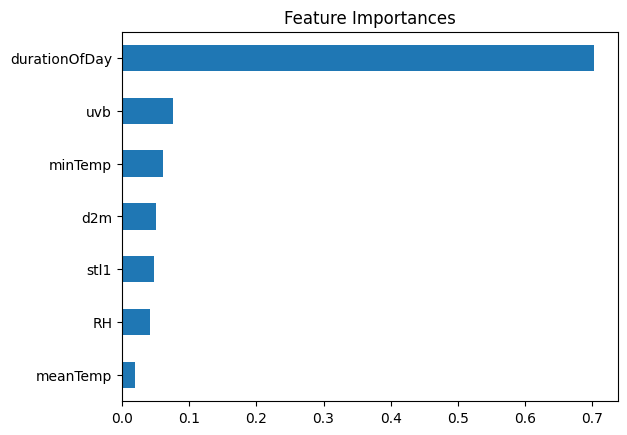

Residual Sum of Squares (RSS): 41234.765825203285


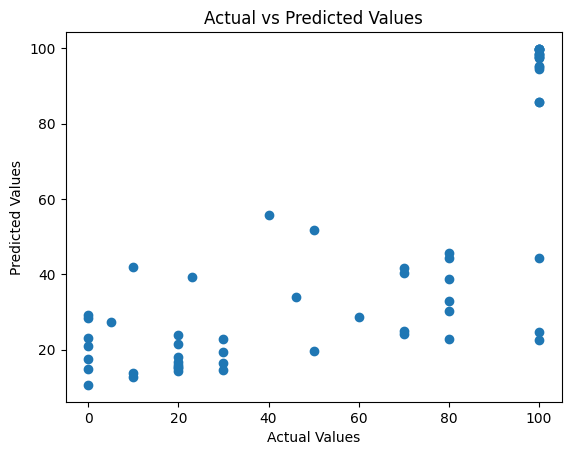

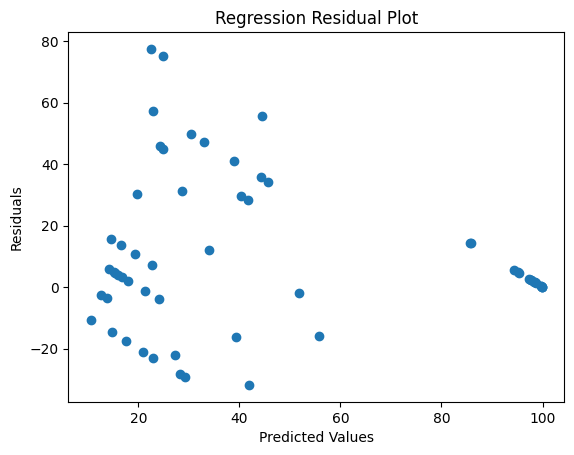

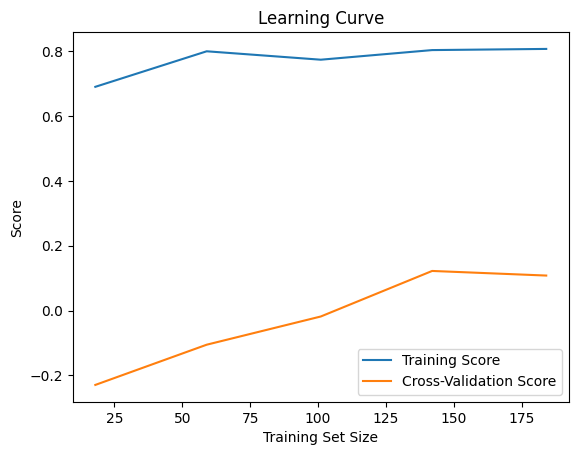

0.5234612587060395
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


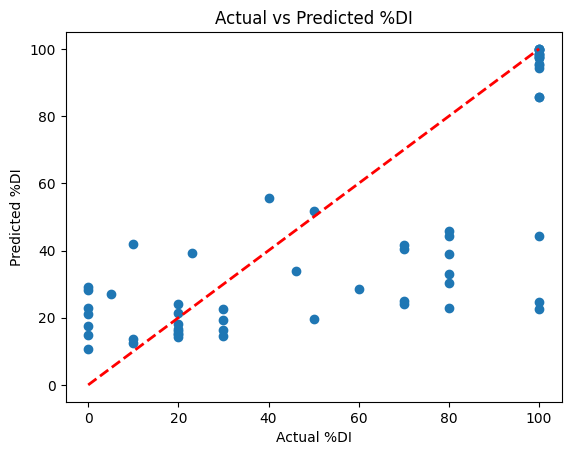

   Actual %DI  Predicted %DI Absolute Difference
0         100          44.39               55.61
1          20          16.75                3.25
2           0          10.59               10.59
3         100          85.71               14.29
4         100          97.37                2.63
5          80          22.83               57.17
6           0          17.54               17.54
7         100          99.85                0.15
8          10          13.70                 3.7
9          10          41.82               31.82
10         60          28.66               31.34
11         30          14.48               15.52
12         23          39.22               16.22
13         10          12.59                2.59
14        100          85.79               14.21
15         70          40.40                29.6
16         20          15.09                4.91
17        100          98.61                1.39
18        100          95.41                4.59
19        100       

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_excel('mun-test.xlsx')
df = df.drop(['date', 'longitude', 'latitude', 'sunset', 'sunrise'], axis=1)

df2 = pd.read_excel('Fix.xlsx')
df2 = df2.drop([0])

# Selecting features and target variable
X = df.iloc[:, [0, 2, 5, 6, 7, 9, 11]]
y = df2.iloc[:, -4].values

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Train the model with the best parameters
best_rf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

# Cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='neg_mean_squared_error')
avg_mse_cv = -np.mean(cv_scores)
print("Average Cross-Validation MSE:", avg_mse_cv)

# Feature importances plot
model_ranks = pd.Series(best_rf.feature_importances_, index=x_train.columns, name="Importance").sort_values()
ax = model_ranks.plot(kind='barh')
plt.title("Feature Importances")
plt.show()

# Residual Sum of Squares (RSS)
residuals = y_test - y_pred
rss = sum(residuals**2)
print("Residual Sum of Squares (RSS):", rss)

# Visualization of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

# Regression Residual Plot
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Regression Residual Plot")
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_rf, X, y, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

print(best_rf.score(x_test, y_test))
print("Best Hyperparameters:", best_params)

# Visualization of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # สร้างเส้นทแยงมุม 45 องศา
plt.xlabel("Actual %DI")
plt.ylabel("Predicted %DI")
plt.title("Actual vs Predicted %DI")
plt.show()

# Make predictions on the test set
y_pred = best_rf.predict(x_test)
# Round predictions to 2 decimal places
y_pred_rounded = np.round(y_pred, 2)
# Create DataFrame with Actual and Predicted values
result_df = pd.DataFrame({'Actual %DI': y_test, 'Predicted %DI': y_pred_rounded})
result_df['Absolute Difference'] = np.abs(result_df['Actual %DI'] - result_df['Predicted %DI'])
# Display the DataFrame
print(result_df)

